# 데이터셋 API
- 데이터 입력 파이프라인을 위한 패키지
- tf.data 패키지에서 제공
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스 객체를 사용 또는 만들어 사용

## 데이터 입력 파이프라인이란
**모델에 공급**되는 데이터에 대한 전처리 작업, 공급 담당    
- 이미지 데이터의 경우
    - 분산 파일시스템으로부터 이미지 모으는 작업 
    - 이미지에 노이즈를 주거나 변형하는 작업(이미지 증식)
    - 배치 학습을 위해 무작위로 데이터 선택해 배치데이터 만드는 작업
- 텍스트 데이터 경우
    - 원문을 토큰화하는 작업
    - 임베딩하는 작업
    - 길이가 다른 데이터를 패딩하여 합치는 작업 


## 데이터셋 API 사용 3단계
1. 데이터셋 생성(데이터 소스 만드는 과정)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스를 사용해 메모리나 파일에 있는 데이터를 데이터소스로 만듬
        - 원본 데이터(raw data)로 데이터셋 객체 생성 -> 모델에 전달
        - 원본 데이터가 어떻게 저장되어있는지에 따라 읽어들이는 방법 다름
        - from_tensor_slices(): 메모리로 저장되어 있음
        - from_generator(): 파일로 저장되어 있음
        - tf.data.TFRecordDataset: TFRecord 파일로 저장되어 있음
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터 생성 -> 데이터가 메모리에 저장되어 있는 경우 
2. 데이터셋 변형: map(), filter(), batch() 등 메소드를 이용해 데이터 소스 변형
    - map(): 데이터 변경
    - filter(): 필요한 데이터만 골라냄
    - batch(): batch 설정
3. for 반복문에서 iterate를 통해 데이터셋 사용

## Dataset의 주요 메소드
- map(함수) : dataset의 각 원소들을 함수로 처리
- shuffle(크기): dataset 원소들의 순서 섞음. 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플 안됨=>데이터가 과도하게 많으면 적게 주기도 함)
- batch(size) : 반복시 제공할 데이터 수. 지정한 batch size만큼 data 꺼내줌

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 0 ~ 8: 9개의 데이터 -> 우리가 학습해야하는 데이터
arr = np.arange(9)

In [28]:
# 메모리에 ndarray로 저장된 데이터를 이용해 Dataset 객체 생성
dataset = tf.data.Dataset.from_tensor_slices(arr)
type(dataset)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [29]:
# 각각 원소를 변환하는 작업을 Dataset에 추가 - Dataset.map(변환함수)
dataset = dataset.map(lambda x:x**2)
type(dataset)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [8]:
# 2의 배수만 걸러내기
# def func(x):
#     return x%2 == 0
# dataset = dataset.filter(lambda x:x%2 == 0)

In [30]:
# 값들을 섞어주는 작업
dataset = dataset.shuffle(9)

# shuffle(3) -> 데이터 3개만 섞을거야
# 데이터 양이 많을 때, 메모리 양에 맞추어 일부만이라도 섞게 하는 것
# dataset = dataset.shuffle(3)

In [26]:
# 한번에 지정한 개수(3)만큼 제공
dataset = dataset.batch(3)

In [27]:
# batch(3)까지 했을 때 결과
for a in dataset:
    print(a)

tf.Tensor([49 25  0], shape=(3,), dtype=int32)
tf.Tensor([36  9 16], shape=(3,), dtype=int32)
tf.Tensor([ 1  4 64], shape=(3,), dtype=int32)


In [31]:
dataset = dataset.batch(4)

In [32]:
# batch(4)까지 했을 때 결과
for a in dataset:
    print(a)

tf.Tensor([ 1  4 36 49], shape=(4,), dtype=int32)
tf.Tensor([64  9 16 25], shape=(4,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


In [22]:
# Dataset에서 제공되는 값들을 조회
# tensorflow 버전의 배열
for a in dataset:
    print(a)

tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)


In [33]:
# data feeding
= np.arange(10)
y = np.arange(10, 20)
x.shape, y.shape

((10,), (10,))

In [34]:
# 데이터 튜플로 묶어서 읽을 때, 두 배열은 묶여서 하나로 관리됨
# 두 데이터 원소 개수가 같아야 함
ds = tf.data.Dataset.from_tensor_slices((x, y))

In [35]:
# 튜플로 반환
# tf.Tensor: 넘파이 자료구조 ndarray인 것처럼, 텐서플로우 자료구조가 텐서 
for a in ds:
    print(a)
    break

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [36]:
# 파이썬에서 zip함수 쓴 것과 동일한 결과
for a in ds:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [37]:
# x: 2제곱, y: 3제곱
ds2 = ds.map(lambda x, y : (x**2, y**3))

# def map_func(x, y): dataset에 2개의 배열 넣었을 경우, 변수 2개로 각각 받음
#     return x**2, y**3

In [ ]:
# y값 3제곱 하지 않을 때
# ds2 = ds.map(lambda x, y : (x**2, y))

In [38]:
for a in ds2:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)
(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)


In [41]:
# X, y 같은 인덱스끼리 섞임
ds3 = ds2.shuffle(10)

In [42]:
# 같은 인덱스끼리 반환됨
for a in ds3:
    print(a)

(<tf.Tensor: shape=(), dtype=int32, numpy=16>, <tf.Tensor: shape=(), dtype=int32, numpy=2744>)
(<tf.Tensor: shape=(), dtype=int32, numpy=25>, <tf.Tensor: shape=(), dtype=int32, numpy=3375>)
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=1000>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=5832>)
(<tf.Tensor: shape=(), dtype=int32, numpy=36>, <tf.Tensor: shape=(), dtype=int32, numpy=4096>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=1331>)
(<tf.Tensor: shape=(), dtype=int32, numpy=49>, <tf.Tensor: shape=(), dtype=int32, numpy=4913>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=1728>)
(<tf.Tensor: shape=(), dtype=int32, numpy=81>, <tf.Tensor: shape=(), dtype=int32, numpy=6859>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=2197>)


In [43]:
ds4 = ds2.batch(4)

In [44]:
for a in ds4:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)


In [46]:
# dataset.repeat(count): count 횟수만큼 반복. count 생략시 무한제공
for a in ds4.repeat(3):
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 25, 36, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 3375, 4096, 4913])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([64, 81])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([5832, 6859])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1000, 1331, 1728, 2197])>)
(<tf.Tensor: shape=(4,)

In [49]:
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x ** 2, y ** 3)).shuffle(10).batch(4).repeat(3)

In [50]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  4,  9, 49])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1728, 2197, 4913])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([25,  0, 64,  1])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([3375, 1000, 5832, 1331])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([36, 16])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([4096, 2744])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 1, 16, 64, 36])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([1331, 2744, 5832, 4096])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([81,  4, 49,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([6859, 1728, 4913, 2197])>)
(<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 0, 25])>, <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1000, 3375])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 9,  1, 16,  0])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2197, 1331, 2744, 1000])>)
(<tf.Tensor

In [58]:
# drop_remainder 사용
dataset = tf.data.Dataset.from_tensor_slices((x, y)).map(lambda x, y : (x ** 2, y ** 3)).shuffle(10).batch(4, drop_remainder = True)

In [59]:
for a in dataset:
    print(a)

(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([36, 49,  0,  9])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([4096, 4913, 1000, 2197])>)
(<tf.Tensor: shape=(4,), dtype=int32, numpy=array([16, 64, 81, 25])>, <tf.Tensor: shape=(4,), dtype=int32, numpy=array([2744, 5832, 6859, 3375])>)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [53]:
# random seed
np.random.seed(1)
tf.random.set_seed(1)

In [87]:
# 데이터셋 로딩 -> 데이터 양이 적어 딥러닝에 적합하지 않은 데이터셋
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [55]:
# 회귀(Regression)
y_train[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

In [56]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [88]:
# 하이퍼파라미터 값들을 설정
# 학습률
# 에폭 횟수: 1 epoch = 전체 데이터셋 1번 사용한 것
# batch_size. 32개 데이터셋마다 파라미터(가중치) 업데이트
LEARNING_RATE = 0.001  
N_EPOCHS = 200  
N_BATCHS = 32

# train set의 개수
# test set의 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]

# input data의 feature(컬럼 개수)
N_FEATURES = X_train.shape[1]

In [89]:
# 1. Dataset 생성
# SHUFFLE은 EPOCH별로 일어남 -> 200번
# drop_remainder = True: 마지막에 batch size보다 제공할 데이터가 적으면 학습시 제공하지 말고 버려라
# repeat(): 여러 epoch 돌때마다 계속 데이터 제공하기 위해. repeat 지정하지 않으면 1 epoch 후, 데이터 제공하지 못함
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder = True).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [90]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    # 입력 Layer를 따로 정의.
    # 첫번째 Layer 만들때 input_shape(1개의 입력데이터의 형태) 지정하면 입력 Layer층이 자동으로 생성
    #     model.add(keras.layers.Input((크기)))
    model.add(keras.layers.Dense(units = 16, activation  = 'relu', input_shape = (N_FEATURES,)))  # 13개 컬럼 = N_FEATURES
    model.add(keras.layers.Dense(units = 8, activation = 'relu'))
    # 출력 Layer 
    # 회귀 출력층: units 수는 1개, activation 함수는 사용하지 않음
    model.add(keras.layers.Dense(units = 1))
    
    # 모델 컴파일
    # optimizer의 하이퍼파라미터를 기본값으로 쓸 경우, 문자열로 'adam'으로 선언하면됨
    # 회귀의 Loss 함수: mse
    # 회귀의 metrics: mse 사용해 따로 정의하지 않음
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'mse')
    return model

In [91]:
model = create_model()

In [92]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [93]:
# step: 한번 가중치 업데이트. 단위 - batch_size
# epoch: 전체 train 데이터를 1번 학습

# 학습 데이터 개수//배치수
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))

In [94]:
history = model.fit(train_dataset,  # train dataset(X_train, y_train)
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,  # 1 에폭당 step 수(텐서플로우 2.3 버전 이상에서는 자동으로 해줌)
                    validation_data = val_dataset,  # 검증 Dataset 지정
                    validation_steps = validation_steps)

Train for 12 steps, validate for 4 steps
Epoch 1/200
12/12 [==============================] - 1s 118ms/step - loss: 342.9164 - val_loss: 283.7399
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 190.9660 - val_loss: 180.9629
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 126.5850 - val_loss: 151.2084
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 96.9908 - val_loss: 123.9525
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 87.3507 - val_loss: 118.6772
Epoch 6/200
12/12 [==============================] - ETA: 0s - loss: 116.382 - 0s 6ms/step - loss: 82.0030 - val_loss: 111.5324
Epoch 7/200
12/12 [==============================] - 0s 10ms/step - loss: 75.4587 - val_loss: 108.7098
Epoch 8/200
12/12 [==============================] - 0s 7ms/step - loss: 71.8383 - val_loss: 105.3963
Epoch 9/200
12/12 [==============================] - 0s 6ms/step - loss: 70.4384 - val_loss: 110.2355
Epoch 10/

Epoch 160/200
12/12 [==============================] - 0s 6ms/step - loss: 22.0435 - val_loss: 39.2478
Epoch 161/200
12/12 [==============================] - 0s 6ms/step - loss: 24.2327 - val_loss: 38.9043
Epoch 162/200
12/12 [==============================] - 0s 5ms/step - loss: 22.9507 - val_loss: 37.6705
Epoch 163/200
12/12 [==============================] - 0s 5ms/step - loss: 22.4642 - val_loss: 38.3463
Epoch 164/200
12/12 [==============================] - 0s 5ms/step - loss: 23.2577 - val_loss: 37.9847
Epoch 165/200
12/12 [==============================] - 0s 4ms/step - loss: 22.3990 - val_loss: 38.0546
Epoch 166/200
12/12 [==============================] - 0s 6ms/step - loss: 24.9288 - val_loss: 39.2256
Epoch 167/200
12/12 [==============================] - 0s 6ms/step - loss: 23.3782 - val_loss: 38.9063
Epoch 168/200
12/12 [==============================] - 0s 6ms/step - loss: 24.9518 - val_loss: 38.8824
Epoch 169/200
12/12 [==============================] - 0s 6ms/step - loss

In [95]:
# 딕셔너리로 반환
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [96]:
history.history

{'loss': [342.91639073689777,
  190.96595509847006,
  126.58495044708252,
  96.99082501729329,
  87.35074361165364,
  82.00296688079834,
  75.45868460337321,
  71.83833567301433,
  70.43837396303813,
  68.97678629557292,
  69.76152801513672,
  67.67764091491699,
  66.4915582338969,
  65.30295419692993,
  64.63210233052571,
  60.771044413248696,
  66.6203540166219,
  56.849200089772545,
  61.809296449025474,
  62.383349100748696,
  62.36900822321574,
  59.88281178474426,
  58.32865238189697,
  57.40733655293783,
  56.68204673131307,
  57.40256150563558,
  54.21955521901449,
  52.31430848439535,
  51.53387721379598,
  52.08818689982096,
  52.525094985961914,
  51.02952257792155,
  51.018221060434975,
  49.619771798451744,
  50.14012813568115,
  50.047361532847084,
  48.96723477045695,
  45.82097880045573,
  47.125127951304115,
  49.80625629425049,
  48.17972739537557,
  52.87158219019572,
  44.80911445617676,
  44.20755624771118,
  41.50920009613037,
  41.641368548075356,
  42.8857989311

In [97]:
history.history['loss']

[342.91639073689777,
 190.96595509847006,
 126.58495044708252,
 96.99082501729329,
 87.35074361165364,
 82.00296688079834,
 75.45868460337321,
 71.83833567301433,
 70.43837396303813,
 68.97678629557292,
 69.76152801513672,
 67.67764091491699,
 66.4915582338969,
 65.30295419692993,
 64.63210233052571,
 60.771044413248696,
 66.6203540166219,
 56.849200089772545,
 61.809296449025474,
 62.383349100748696,
 62.36900822321574,
 59.88281178474426,
 58.32865238189697,
 57.40733655293783,
 56.68204673131307,
 57.40256150563558,
 54.21955521901449,
 52.31430848439535,
 51.53387721379598,
 52.08818689982096,
 52.525094985961914,
 51.02952257792155,
 51.018221060434975,
 49.619771798451744,
 50.14012813568115,
 50.047361532847084,
 48.96723477045695,
 45.82097880045573,
 47.125127951304115,
 49.80625629425049,
 48.17972739537557,
 52.87158219019572,
 44.80911445617676,
 44.20755624771118,
 41.50920009613037,
 41.641368548075356,
 42.885798931121826,
 41.76032670338949,
 38.64163319269816,
 39.5606

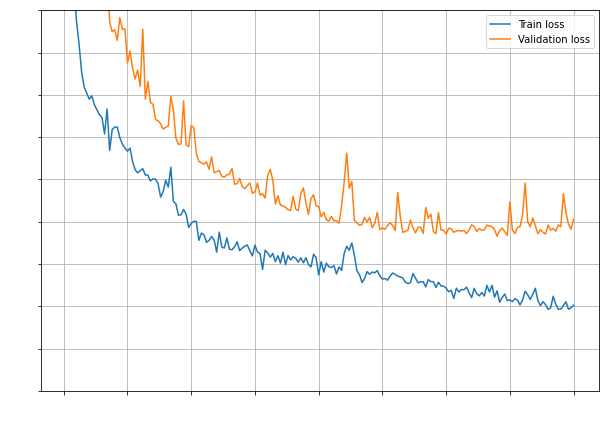

In [99]:
# epoch당 loss, val_loss 변화에 대해 선그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7))

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label = 'Train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label = 'Validation loss')

plt.xticks(color = 'w')
plt.yticks(color = 'w')
plt.xlabel('Epochs', color = 'w')
plt.ylabel('Loss(MSE)', color = 'w')

plt.ylim(0, 90)
plt.legend()
plt.grid(True)
plt.show()

In [100]:
# 평가
model.evaluate(val_dataset)

4/4 [==============================] - 0s 7ms/step - loss: 40.5583


40.55827713012695

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중 분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목 나타냄:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤하며 코드를 테스트하고 디버깅하는 용도로 좋음

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이. *레이블*(label)은 0에서 9까지의 정수 배열. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나타냄.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [102]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [103]:
pred = 2
class_names[pred]

'Pullover'

In [104]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

np.random.seed(1)
tf.random.set_seed(1)

In [107]:
# 데이터셋 읽기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [108]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [109]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [110]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

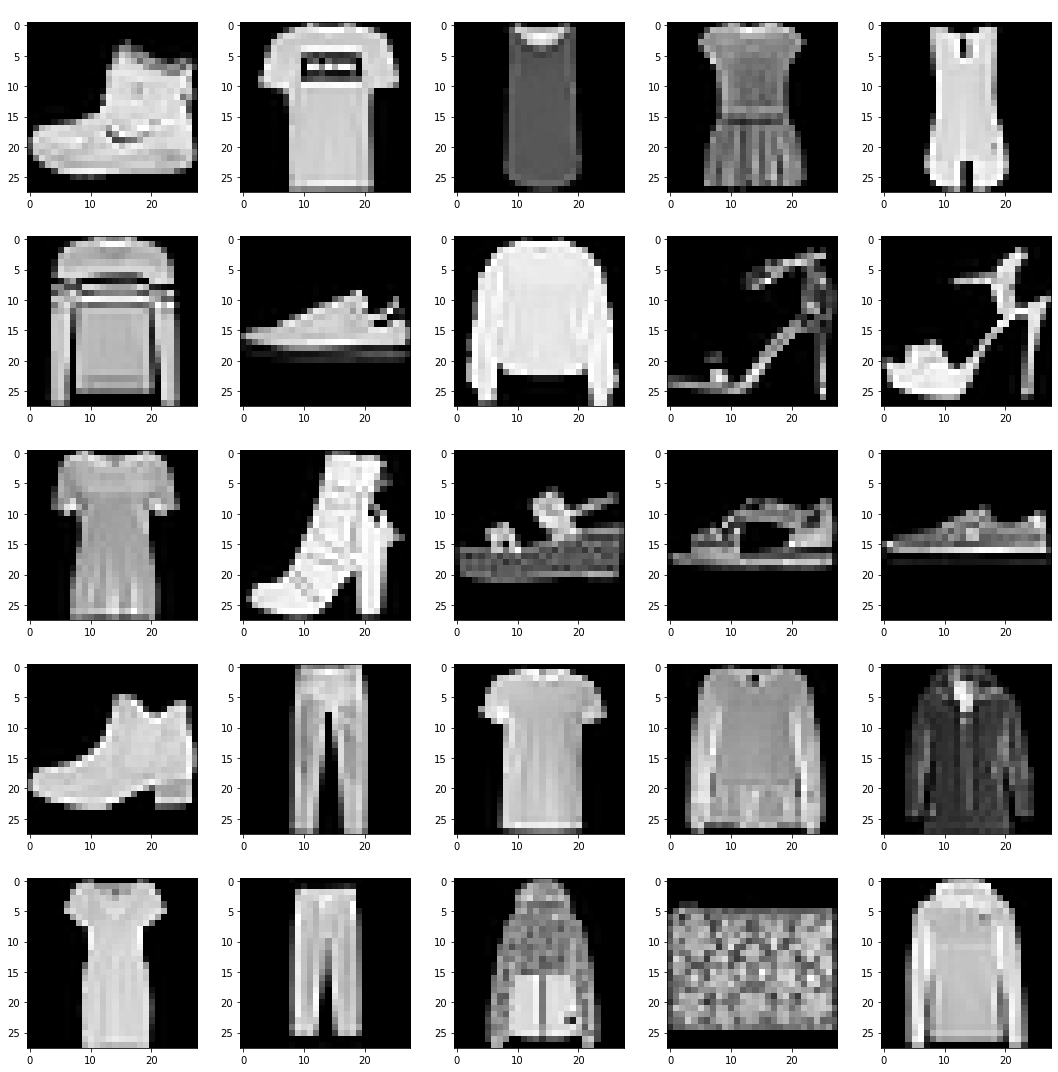

In [113]:
# 이미지 확인
import matplotlib.pyplot as pt
plt.figure(figsize = (15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap = 'gray')
    plt.title(class_names[y_train[i]], color = 'w')
    
plt.tight_layout()
plt.show()

In [111]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 50
N_BATCHS = 100

N_CLASS = 10  # CLASS CATEGORY 개수
N_TRAIN = X_train.shape[0]
N_TEST = X_test.shape[0]
IMAGE_SIZE = 28

In [115]:
# 데이터 전처리
# X(이미지): 0 ~ 255 => 0 ~ 1
X_train = X_train/255
X_test = X_test/255

np.max(X_train), np.min(X_train)

# Y (Label) => 다중분류: OneHotEncoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [116]:
np.max(X_train), np.min(X_train)

(1.0, 0.0)

In [117]:
y_test.shape

(10000, 10)

In [118]:
y_test[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [119]:
# Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)\
                               .repeat()

In [120]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCHS)

In [ ]:
# from tensorflow.keras.layers import Flatten, Dense, Input

# model.add(Input(28, 28))
# model.add(Dense(...))

In [121]:
# 모델 구현
def create_model():
    model = keras.Sequential()
    
    # 입력층(Input Layer)
    # model.add(keras.layers.input((28*28,)))
    
    # mode.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Input((28, 28)))
    model.add(keras.layers.Flatten())
    
    # 은닉층(Hidden Layer)
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    model.add(keras.layers.Dense(64, activation = 'relu'))
    
    # 출력층(Output Layer)
    # 다중 분류: units - class category 개수, activation-softmax => 각 class별 확률
    model.add(keras.layers.Dense(N_CLASS, activation = 'softmax'))
    
    # 컴파일. 다중분류: Loss-categorical_crossentropy(y를 one_hot_encoding 한 경우)
    #                sparse_categorical_crossentropy(y를 one_hot_encoding 안한 경우)
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [122]:
model = create_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


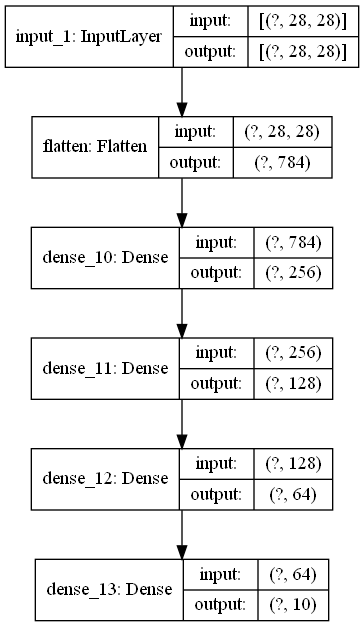

In [123]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'fashion_mnist_model.png', show_shapes = True)

In [125]:
# 학습
## epoch당 steps 수 계산
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
print(steps_per_epoch, validation_steps)

600 100


In [126]:
# 학습
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Train for 600 steps, validate for 100 steps
Epoch 1/50
600/600 [==============================] - 9s 15ms/step - loss: 0.5262 - accuracy: 0.8147 - val_loss: 0.4183 - val_accuracy: 0.8510
Epoch 2/50
600/600 [==============================] - 7s 12ms/step - loss: 0.3698 - accuracy: 0.8647 - val_loss: 0.4007 - val_accuracy: 0.8556
Epoch 3/50
600/600 [==============================] - 7s 12ms/step - loss: 0.3311 - accuracy: 0.8796 - val_loss: 0.3616 - val_accuracy: 0.8687
Epoch 4/50
600/600 [==============================] - 8s 13ms/step - loss: 0.3071 - accuracy: 0.8877 - val_loss: 0.3538 - val_accuracy: 0.8710
Epoch 5/50
600/600 [==============================] - 7s 12ms/step - loss: 0.2882 - accuracy: 0.8924 - val_loss: 0.3411 - val_accuracy: 0.8732
Epoch 6/50
600/600 [==============================] - 7s 12ms/step - loss: 0.2721 - accuracy: 0.8981 - val_loss: 0.3318 - val_accuracy: 0.8806
Epoch 7/50
600/600 [==============================] - 8s 14ms/step - loss: 0.2589 - accuracy: 0.90

In [127]:
# 평가 - test set (마지막에 1번)
model.evaluate(val_dataset)

100/100 [==============================] - 0s 5ms/step - loss: 0.5527 - accuracy: 0.8908


[0.5527272379398346, 0.8908]

In [ ]:
# 결과 시각화 (Loss와 지정한 평가지표의 epoch당 변화 시각화) => 선그래프

In [128]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

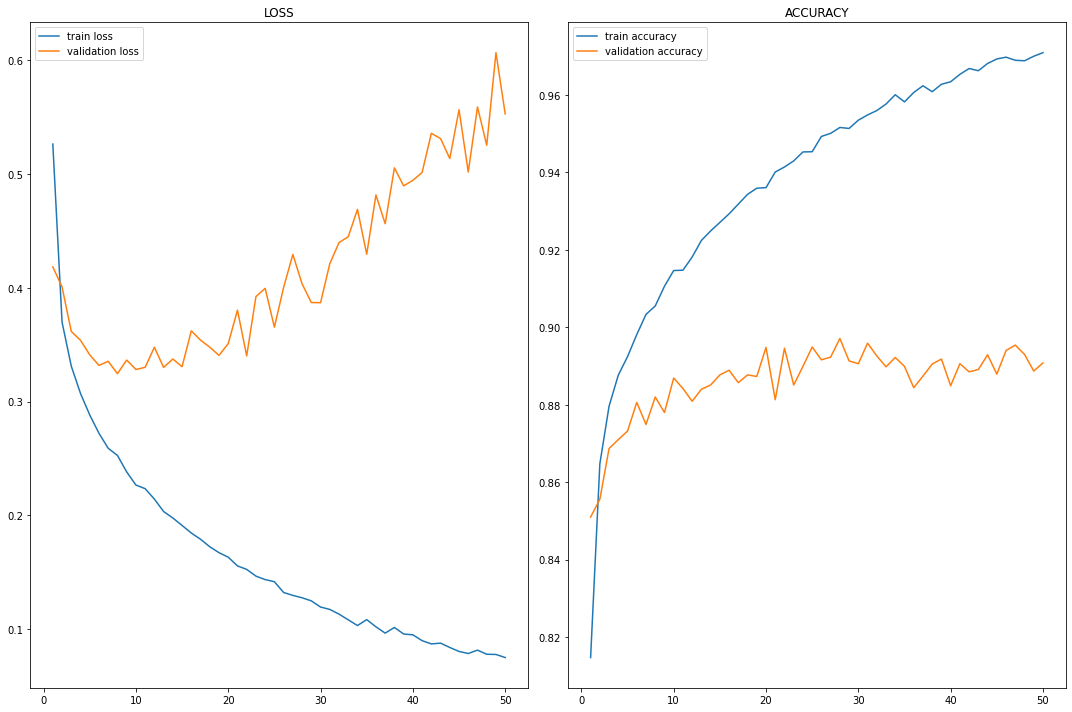

In [130]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label = 'train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label = 'validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label = 'train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label = 'validation accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()

## IMDB 감성분성
### 이진분류(Binary Classification)
- 영화 댓글: 부정(0)/긍정(1)

In [3]:
import pickle

# 데이터 로드
with open('imdb_dataset/x_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('imdb_dataset/x_test.pkl', 'rb') as f:
    X_test = pickle.load(f)
    
with open('imdb_dataset/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
    
with open('imdb_dataset/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [4]:
X_train[0]

'day lead think even think boy young men commit mutual suicide slaughter classmate capture bizarre mode human decide withdraw common civility order define mutual world couple destruction perfect movie give money time filmmaker actor remarkable product term explain motif action young suicide murderer well elephant term film get rationalistic skin far far well film almost anything likely see flaw honest terrible honesty'

In [5]:
y_train[:5]

array([1, 0, 1, 0, 0])

In [16]:
# X -> 벡터화(숫자 변경)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 10000)
tfidf.fit(X_train + X_test)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
X_train_tfidf.shape, X_test_tfidf.shape

((25000, 10000), (25000, 10000))

In [18]:
X_train_tfidf

<25000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2055897 stored elements in Compressed Sparse Row format>

In [19]:
y_train.shape

(25000,)

In [20]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 10
N_BATCHS = 50

N_TRAIN = X_train_tfidf.shape[0]
N_TEST = X_test_tfidf.shape[0]
N_FEATURE = X_train_tfidf.shape[1]

In [21]:
# Dataset 생성 - y: 이진분류 - one hot-encoding(X)
# Sparase Matrix => ndarray
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tfidf.toarray(), y_train))\
                               .shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)\
                               .repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((X_test_tfidf.toarray(), y_test)).batch(N_BATCHS)

In [26]:
# 모델 생성
def create_model():
    model = keras.Sequential()
    
    # Input layer
    model.add(keras.layers.Input((N_FEATURE, )))
    
    # Hidden Layer
    model.add(keras.layers.Dense(512, activation = 'relu'))
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(256, activation = 'relu'))
    model.add(keras.layers.Dense(128, activation = 'relu'))
    
    # Output Layer: 이진분류 - units:1, activation = 'sigmoid'(Logistic 함수)
    model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    
    # 컴파일: 이진분류 - activation: sigmoid => Loss: binary_crossentropy
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [27]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 5,350,657
Trainable params: 5,350,657
Non-trainable params: 0
_________________________________________________________________


In [28]:
N_FEATURE * 512 + 512

5120512

In [30]:
import matplotlib.pyplot as plt
plot_model(model, show_shapes = True)

NameError: name 'plot_model' is not defined

In [31]:
# 학습
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST / N_BATCHS))
steps_per_epoch, validation_steps

(500, 500)

In [32]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = val_dataset,
                    validation_steps = validation_steps)

Train for 500 steps, validate for 500 steps
Epoch 1/10
500/500 [==============================] - 80s 160ms/step - loss: 0.3264 - accuracy: 0.8606 - val_loss: 0.3546 - val_accuracy: 0.8518
Epoch 2/10
500/500 [==============================] - 62s 125ms/step - loss: 0.1489 - accuracy: 0.9419 - val_loss: 0.4344 - val_accuracy: 0.8470
Epoch 3/10
500/500 [==============================] - 91s 182ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.7184 - val_accuracy: 0.8396
Epoch 4/10
500/500 [==============================] - 75s 150ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 1.2161 - val_accuracy: 0.8452
Epoch 5/10
500/500 [==============================] - 88s 176ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 1.0844 - val_accuracy: 0.8335
Epoch 6/10
500/500 [==============================] - 92s 184ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.3925 - val_accuracy: 0.8400
Epoch 7/10
500/500 [==============================] - 92s 184ms/step - loss: 0.0028 - 

In [33]:
# 평가
model.evaluate(val_dataset)

500/500 [==============================] - 13s 27ms/step - loss: 1.5482 - accuracy: 0.8380


[1.5482409756183624, 0.83804]

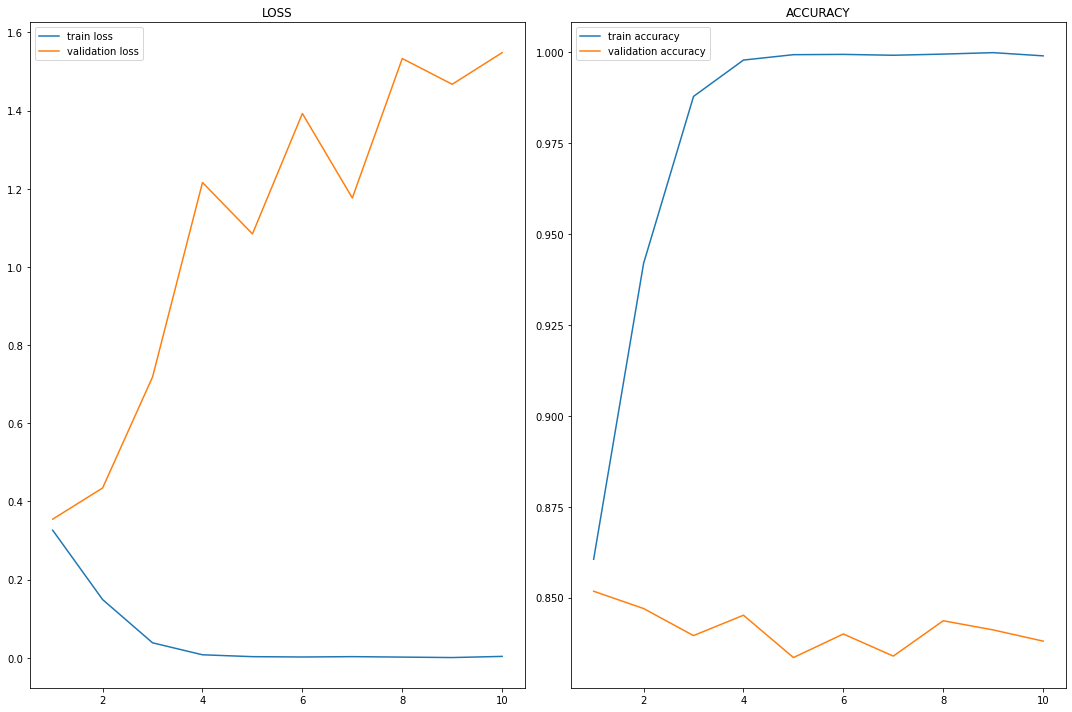

In [34]:
plt.figure(figsize = (15, 10))
plt.subplot(1, 2, 1)

plt.plot(range(1, N_EPOCHS+1), history.history['loss'], label = 'train loss')
plt.plot(range(1, N_EPOCHS+1), history.history['val_loss'], label = 'validation loss')
plt.title('LOSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, N_EPOCHS+1), history.history['accuracy'], label = 'train accuracy')
plt.plot(range(1, N_EPOCHS+1), history.history['val_accuracy'], label = 'validation accuracy')
plt.title('ACCURACY')
plt.legend()

plt.tight_layout()
plt.show()